In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
train=pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train=train.drop(['label'],axis=1)
x_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train=x_train.astype('float32')/255

In [5]:
y_train=train['label']
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [6]:
test=pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_test=test.drop(['label'],axis=1)
x_test

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x_test=x_test.astype('float32')/255

In [9]:
y_test=test['label']
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [10]:
model=Sequential([
    Dense(128,input_shape=(784,),activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=SGD(learning_rate=0.1,momentum=0))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(x_train,y_train,epochs=11,batch_size=128,validation_split=0.2)

Epoch 1/11
375/375 [==============================] - 2s 4ms/step - loss: 0.5792 - accuracy: 0.8269 - val_loss: 0.2731 - val_accuracy: 0.9211
Epoch 2/11
375/375 [==============================] - 1s 4ms/step - loss: 0.2790 - accuracy: 0.9187 - val_loss: 0.1916 - val_accuracy: 0.9456
Epoch 3/11
375/375 [==============================] - 1s 4ms/step - loss: 0.2145 - accuracy: 0.9358 - val_loss: 0.1594 - val_accuracy: 0.9543
Epoch 4/11
375/375 [==============================] - 1s 4ms/step - loss: 0.1793 - accuracy: 0.9474 - val_loss: 0.1396 - val_accuracy: 0.9595
Epoch 5/11
375/375 [==============================] - 1s 4ms/step - loss: 0.1562 - accuracy: 0.9542 - val_loss: 0.1258 - val_accuracy: 0.9638
Epoch 6/11
375/375 [==============================] - 1s 4ms/step - loss: 0.1355 - accuracy: 0.9600 - val_loss: 0.1190 - val_accuracy: 0.9656
Epoch 7/11
375/375 [==============================] - 1s 4ms/step - loss: 0.1215 - accuracy: 0.9639 - val_loss: 0.1156 - val_accuracy: 0.9655
Epoch 

In [12]:
los,acc=model.evaluate(x_test,y_test)
print(los)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9725
0.08763300627470016
0.9725000262260437


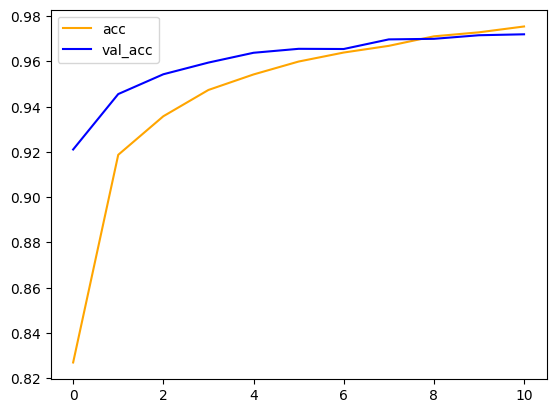

In [17]:
mat.plot(history.history['accuracy'],label='acc',color='orange')
mat.plot(history.history['val_accuracy'],label='val_acc',color='blue')
mat.legend()
mat.show()

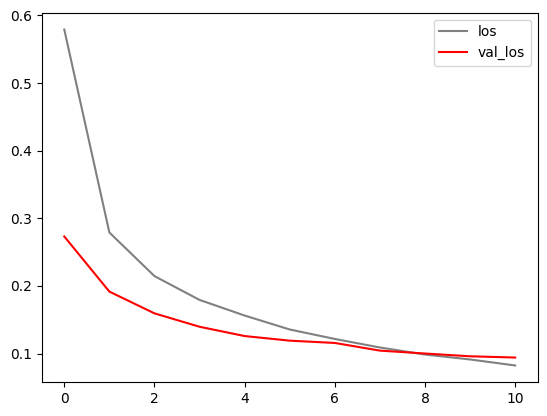

In [18]:
mat.plot(history.history['loss'],label='los',color='gray')
mat.plot(history.history['val_loss'],label='val_los',color='red')
mat.legend()
mat.show()